In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Import Librarys

In [3]:
import os
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer

from sklearn.metrics import confusion_matrix
from __future__ import print_function
from keras.utils.np_utils import to_categorical

import pandas as pd
import numpy as np
np.random.seed(1337)

### Read Data

In [4]:
trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intrusion Detection in Cyber Security/kddTraining.csv', header=None)
testData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intrusion Detection in Cyber Security/kddTesting.csv', header=None)

print('Dimension of Training data: ',trainData.shape)
print('Dimension of Testing data: ',testData.shape)

Dimension of Training data:  (494021, 42)
Dimension of Testing data:  (311029, 42)


### Normalization, and Transform

In [5]:
# Training Data
data = trainData.iloc[:,1:42]
norm = Normalizer().fit(data)
trainX = norm.transform(data)
trainX = np.array(trainX)
trainLabel = np.array(trainData.iloc[:,0])

# Testing Data
data = testData.iloc[:,1:42]
norm = Normalizer().fit(data)
testX = norm.transform(data)
testX = np.array(testX)
testLabel = np.array(testData.iloc[:,0])

### Train the model

In [7]:
batch_size = 64

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.02))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.02))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.02))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit(trainX, trainLabel,  batch_size=batch_size, epochs=50)
model.save("dnn_model.h5")

Epoch 1/50
7720/7720 [==============================] - 42s 5ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 2/50
7720/7720 [==============================] - 49s 6ms/step - loss: 0.0075 - accuracy: 0.9978
Epoch 3/50
7720/7720 [==============================] - 41s 5ms/step - loss: 0.0063 - accuracy: 0.9981
Epoch 4/50
7720/7720 [==============================] - 39s 5ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 5/50
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0050 - accuracy: 0.9986
Epoch 6/50
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 7/50
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 8/50
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 9/50
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0038 - accuracy: 0.9989
Epoch 10/50
7720/7720 [==============================] - 37s 5ms/step - l

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              43008     
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

### Training accuracy and loss plot

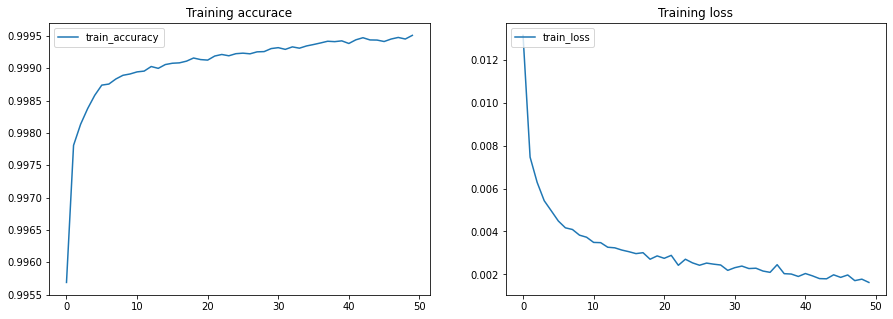

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label="train_accuracy")
plt.title('Training accurace')
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label="train_loss")
plt.title('Training loss')
plt.legend(loc="upper left")
plt.show()

### Test

In [11]:
model.load_weights("dnn_model.h5")
y_pred = model.predict(testX)
y_pred=np.argmax(y_pred,axis=1)

In [12]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(testLabel, y_pred)
recall = recall_score(testLabel, y_pred , average="binary")
precision = precision_score(testLabel, y_pred , average="binary")
f1 = f1_score(testLabel, y_pred, average="binary")